# ラムダ式（無名関数），クロージャ

参考資料

丸田：制御研究者のための関数型プログラミング，システム／制御／情報 / 61 巻 10 号　(2017)

https://doi.org/10.11509/isciesci.61.10_406

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 関数をプロットする

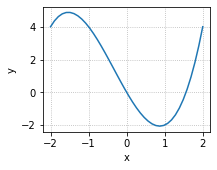

In [2]:
x = np.linspace(-2, 2, 40)
y = x**3 + x**2 - 4*x

fig, ax = plt.subplots(figsize=(3,2.3))
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(ls = ':')

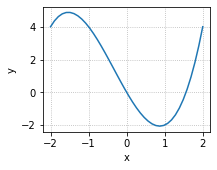

In [3]:
def f(x):
    return x**3 + x**2 - 4*x

fig, ax = plt.subplots(figsize=(3,2.3))
ax.plot(x, f(x))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(ls = ':')

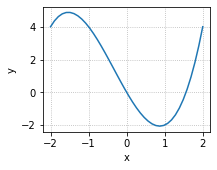

In [4]:
fig, ax = plt.subplots(figsize=(3,2.3))
ax.plot(x, (lambda x:x**3 + x**2 - 4*x)(x))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(ls = ':')

### ラムダ式の恩恵：関数を引数にする

In [5]:
def f(x):
    return x**3 + x**2 - 4*x

In [6]:
#f = lambda x:np.sin(x)

In [7]:
dx = 0.001
d = lambda f:(lambda x:(f(x+dx)-f(x))/dx )

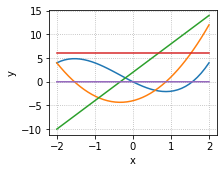

In [8]:
x = np.linspace(-2, 2, 40)

fig, ax = plt.subplots(figsize=(3,2.3))
ax.plot(x, f(x))
ax.plot(x, d(f)(x))
ax.plot(x, d(d(f))(x))
ax.plot(x, d(d(d(f)))(x))
ax.plot(x, d(d(d(d(f))))(x))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(ls = ':')

### クロージャ

In [9]:
K = 1
fc = lambda x, t: [x[1], K*(1.0-x[0]**2)*x[1]-x[0] ]
# dx/dt = fc(x)

In [10]:
Tend = 10
tc = np.arange(0, Tend, 0.01) 
x0 = [2.0, 0]

In [11]:
from scipy.integrate import odeint
xc = odeint(fc, x0, tc)

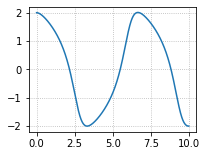

In [12]:
fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(tc, xc[:,0])
ax.grid(ls = ':')

In [13]:
h = 0.2
N = int(Tend/h)

In [14]:
def c2d_euler( fc, h ):
    def fprot(x, t):
        return x + h*np.array(fc(x,t))
    return fprot

In [15]:
def c2d_rk4( fc, h ):
    def fprot(x, t):
        k1 = fc(x, t)
        k2 = fc(x+h/2* np.array(k1), t)
        k3 = fc(x+h/2* np.array(k2), t)
        k4 = fc(x+h*np.array(k3), t)
        return x + h/6*(np.array(k1) + 2*np.array(k2) + 2*np.array(k3) +np.array(k4))
    return fprot

In [16]:
fd = c2d_euler(fc, h)
#fd = c2d_rk4(fc,h)
x = np.zeros((N,2))
x[0,:] = x0
td = np.arange(0, Tend, h)

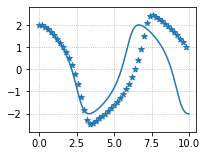

In [17]:
for k in range(0, N-1):
    x[k+1,:] = fd(x[k,:], td)
    
fig, ax = plt.subplots(figsize=(3,2.3))
ax.plot(tc, xc[:,0])
ax.scatter(td, x[:,0], marker='*')
ax.grid(ls=':')